\title{Rectangular EM Waveguide Derivation and Visualization with Python and NumFocus Tools}
\author{Steven K Armour}
\maketitle

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#References" data-toc-modified-id="References-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Math-tools-Needed" data-toc-modified-id="Math-tools-Needed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Math tools Needed</a></span><ul class="toc-item"><li><span><a href="#Gradient-$\nabla-f(r)$" data-toc-modified-id="Gradient-$\nabla-f(r)$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gradient $\nabla f(r)$</a></span></li><li><span><a href="#Divergence-$\nabla-\cdot-\hat{f}(r)$" data-toc-modified-id="Divergence-$\nabla-\cdot-\hat{f}(r)$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Divergence $\nabla \cdot \hat{f}(r)$</a></span></li><li><span><a href="#Laplacian-$\nabla-^2-f(r)$" data-toc-modified-id="Laplacian-$\nabla-^2-f(r)$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Laplacian $\nabla ^2 f(r)$</a></span></li><li><span><a href="#Curl-$\nabla-\times-\hat{f}(r)$" data-toc-modified-id="Curl-$\nabla-\times-\hat{f}(r)$-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Curl $\nabla \times \hat{f}(r)$</a></span></li><li><span><a href="#Vector-Cross-Product-$\hat-f(r)-\times-\hat-g(r)$" data-toc-modified-id="Vector-Cross-Product-$\hat-f(r)-\times-\hat-g(r)$-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Vector Cross Product $\hat f(r) \times \hat g(r)$</a></span></li></ul></li><li><span><a href="#Rectangular-waveguide-Setup" data-toc-modified-id="Rectangular-waveguide-Setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rectangular waveguide Setup</a></span></li><li><span><a href="#Faraday-and-Ampere-Maxwell's-law" data-toc-modified-id="Faraday-and-Ampere-Maxwell's-law-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Faraday and Ampere-Maxwell's law</a></span></li><li><span><a href="#TM" data-toc-modified-id="TM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TM</a></span><ul class="toc-item"><li><span><a href="#Solution-via-boundary-conditions" data-toc-modified-id="Solution-via-boundary-conditions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Solution via boundary conditions</a></span></li></ul></li><li><span><a href="#Cut-off-frequency" data-toc-modified-id="Cut-off-frequency-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cut off frequency</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Side-Note:" data-toc-modified-id="Side-Note:-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Side Note:</a></span></li></ul></li></ul></li><li><span><a href="#Poynting-Vector" data-toc-modified-id="Poynting-Vector-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Poynting Vector</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Generate-and-Store-the-Numerical-Data--in-Xarray-Dataset" data-toc-modified-id="Generate-and-Store-the-Numerical-Data--in-Xarray-Dataset-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Generate and Store the Numerical Data  in Xarray Dataset</a></span></li><li><span><a href="#Visualize-the-Field-Magnitudes-with-YT" data-toc-modified-id="Visualize-the-Field-Magnitudes-with-YT-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Visualize the Field Magnitudes with YT</a></span><ul class="toc-item"><li><span><a href="#Visualizes-the-fields-individually" data-toc-modified-id="Visualizes-the-fields-individually-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Visualizes the fields individually</a></span></li><li><span><a href="#Visualize-the-fields-grouping-field-types" data-toc-modified-id="Visualize-the-fields-grouping-field-types-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Visualize the fields grouping field types</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion-and-Todo" data-toc-modified-id="Conclusion-and-Todo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion and Todo</a></span><ul class="toc-item"><li><span><a href="#Todo:" data-toc-modified-id="Todo:-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Todo:</a></span></li></ul></li></ul></div>

# References
@book{bhooshan_2012,
place={New Delhi},
title={Fundamentals of engineering electromagnetics},
publisher={Oxford University Press},
author={Bhooshan, Sunil},
year={2012}
}

# Introduction
The goal of this notebook is to show how to use the interplay of the tools that are under [NumFouces](https://www.numfocus.org/) to Derive and Simulate the Electric, Magnetic, Poynting (Power) fields in a Rectangular Waveguide 

The following python libraries where utilized
\begin{itemize}
\item **[Sympy](http://www.sympy.org/en/index.html)** Computer Algebra System for symbolic mathematics in Python utilized for the derivation of symbolic equations 

\item **[Numpy](http://www.numpy.org/)** & **[SciPy](https://www.scipy.org/)** the base scientific array numerical libraries and tools for python

\item **[Xarray](http://xarray.pydata.org/en/stable/index.html)** the N dimensional extension to **Pandas** used to store N dimintal data fields

\item **[yt](http://yt-project.org/)** Volumetric Visualization library for Python  used to Visualize the Vector fields
\end{itemize}


In [1]:
from sympy import *
init_printing()
import numpy as np
from scipy.constants import epsilon_0, mu_0
epsilon_0, mu_0

# Math tools Needed

https://avigallen.files.wordpress.com/2014/02/vector-calculus1.pdf

In [2]:
x,y,z,f1,f2,f3 = symbols('x,y,z,f1,f2,f3', real=True)
Cartision = [x,y,z]

## Gradient $\nabla f(r)$

In [3]:
def Grad(f,n=1,Coord=Cartision): 
    return Matrix([Derivative(f, i, n) for i in Coord])


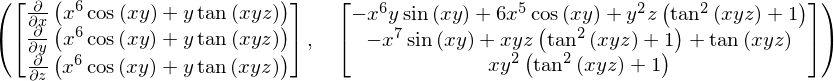

In [4]:
f = x**6*cos(x*y) + y*tan(x*y*z)
Grad(f, 1), Grad(f).doit()

## Divergence $\nabla \cdot \hat{f}(r)$

In [5]:
def Div(f, Coord=Cartision):
    return sum([Derivative(i, j) for i,j in zip(f, Coord)])

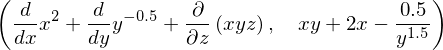

In [6]:
Div([x**2, y**(-.5),z*x*y]),  Div([x**2, y**(-.5),z*x*y]).doit()

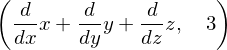

In [7]:
Div([x,y,z]), Div([x,y,z]).doit()

## Laplacian $\nabla ^2 f(r)$

In [8]:
def Laplacian (f, Coord=Cartision): 
    return Div(Grad(f, Coord=Coord), Coord=Coord) 

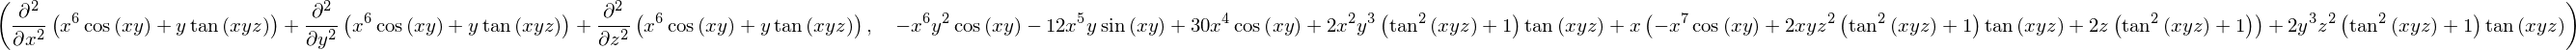

In [9]:
Laplacian(f), Laplacian(f).doit()

## Curl $\nabla \times \hat{f}(r)$

In [10]:
def Curl(f, Coord=Cartision):
    return Matrix([Derivative(f[2],Coord[1]) - Derivative(f[1], Coord[2]), 
                   Derivative(f[0],Coord[2]) - Derivative(f[2],Coord[0]), 
                   Derivative(f[1],Coord[0]) - Derivative(f[0],Coord[1])])

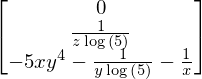

In [11]:
Curl([x*y**5+x*2+log(x*y*z,5),y - ln(x),z]).doit()

In [12]:
Div(Curl([x*y**5+x*2+log(x*y*z,5),y - ln(x),z])).doit()

## Vector Cross Product $\hat f(r) \times \hat g(r)$

In [13]:
def Cross(X, Y, Coord=Cartision):
    return Matrix([X[1]*Y[2]-X[2]*Y[1], 
                   -(X[0]*Y[2]-X[2]*Y[0]), 
                   X[0]*Y[1]-X[1]*Y[0]])

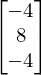

In [14]:
Cross(Matrix([1,2,3]), Matrix([3,2,1]))

# Rectangular waveguide Setup

A rectangular waveguide is a very high frequency (and more often) high-power conduit of electromagnetic waves whose lateral divergence of the fields is greater than in the transversal direction. Meaning that as the wave propagates along its ray direction ( aka down the waveguide or longitudinally) the fields diverges more along its side then along the path of the ray. In order to mitigate these transversal losses a conducting box (waveguide) is constructed along the direction of travel to support the field in the transversal directions via reflections such that for an ideal waveguide (perfect reflection walls) there is no loss of the field in the longitudinal direction

The wave will be governed by the Helmholtz equations 
$$(\nabla^2 +k^2)\psi=0$$
which is a temporally reduced form of the wave equations
$$(\nabla^2 +\dfrac{1}{c^2} \dfrac{\partial^2}{\partial^2 t})u(r, t)=0$$
from which the Helmholtz equation is found by the separation of the spatial and temporal part by the temporal separation constant 
(Note: we assume that we are in a source free location that is far enough from the source that we can use the Plane wave ansatz)

$$k=\omega \sqrt{\mu\epsilon}=\dfrac{\omega}{c}$$
which is the wavenumber
Since the majority of the information that is needed to be known about the solution follows from the spatial information only the solution to the temporal invariant Helmholtz equation will be examined. Further, we establish the coordinate system such that the ray (longitudinal portion) of the wave is along the Z-axis and the waveguides $x, y$ origin is in the bottom left of the rectangular guide. Thus the following educated guess of an ansatz for the solution to the Helmholtz equation is made
 Antiz:
$$\psi=X(x)Y(y)e^{-j\beta z}$$
%$$\beta=\dfrac{2\pi}{\lambda_g}$$

In [15]:
k, propConst, dielect, permConst, radFreq, freq=symbols('k, beta, epsilon, mu, omega, f', real=True)
k, propConst, dielect, permConst, radFreq, freq

define the wavenumber in terms of frequency, dielectric, and permeability

In [16]:
kWaveDef=Eq(k, 2*pi*freq*sqrt(dielect*permConst)); kWaveDef

In [17]:
a, b=symbols('a, b', real=True)

In [18]:
X=Function('X', real=True)(x); Y=Function('Y', real=True)(y)
X, Y

Create the ansatz solution

In [19]:
Antiz=X*Y*exp(-1j*z*propConst); Antiz

Create the Helmholtz Operator and apply it

In [20]:
Helmholtz=lambda F: Eq(Laplacian(F)+k**2 *F, 0)

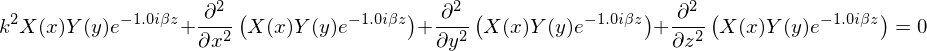

In [21]:
RectGuide=Helmholtz(Antiz); RectGuide

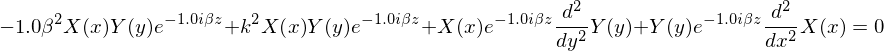

In [22]:
RectGuide=RectGuide.doit(); RectGuide

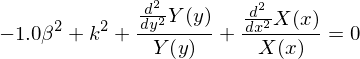

In [23]:
RectGuide=Eq(expand(RectGuide.lhs/Antiz), 0); RectGuide

Define the $x, y$ spatial separate functions

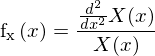

In [24]:
fx=Function('f_x')(x)
fx=Eq(fx, RectGuide.lhs.args[2]); fx 

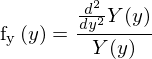

In [25]:
fy=Function('f_y')(y)
fy=Eq(fy, RectGuide.lhs.args[3]); fy 

In [26]:
Const=simplify(sum(RectGuide.lhs.args[:2])); Const

In [27]:
CartSepHelm=Eq(fx.lhs+fy.lhs, -Const); CartSepHelm

There are a lot of arguments about how to find the separation constants. However, I am not going to cover that step though if anyone has a simple explanation of how to get the separation constants from group theory that would be much welcomed. In the meantime, I would recommend this two-part tutorial on separation constants from the Faculty of Khan for the [1D Diffusion Equation](https://www.youtube.com/watch?v=aq2DAkJIA2w)

In [28]:
kx, ky=symbols('k_x, k_y', real=True)
CarSepDef={fx.lhs:-kx**2, fy.lhs:-ky**2}
CarSepDef

In [29]:
CartSepHelm=CartSepHelm.subs(CarSepDef); CartSepHelm

Solve the $x, y$ spatial equations

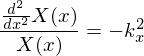

In [30]:
fx=Eq(fx.rhs, -kx**2); fx

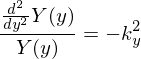

In [31]:
fy=Eq(fy.rhs, -ky**2); fy

In [32]:
XSol=dsolve(fx, X);  XSol

In [33]:
X01, X02, Y01, Y02=symbols('X_01, X_02, Y_01, Y_02')

In [34]:
Xsym=sorted(XSol.free_symbols, key= lambda x :str(x)); Xsym

In [35]:
XSol=XSol.subs({Xsym[0]:X01, Xsym[1]:X02})
XSol

In [36]:
YSol=dsolve(fy, Y);  YSol

In [37]:
Ysym=sorted(YSol.free_symbols, key= lambda x :str(x)); Ysym

In [38]:
YSol=YSol.subs({Ysym[0]:Y01, Ysym[1]:Y02})
YSol

# Faraday and Ampere-Maxwell's law

What we have found is the wave equation for the Electric or Magnetic field that satisfies the spatial part of the wave equation via the Helmholtz equation. However, this does not affix the wavefunction to the energy medium of the Electromagnetic fields which is governed by the Maxwell Set of Equations. To then fully affix the wavefields in the waveguide the waves must also be solutions of the frequency transformed Faraday and Ampere-Maxwell law that defines the interrelation of the ELectric and Magnetic fields

In [39]:
Ex=Function('E_x')(x); Ey=Function('E_y')(y)
Ez=Function('E_z')(z)
Eantz=Ex*Ey*Ez; Eantz

In [40]:
Hx=Function('H_x')(x); Hy=Function('H_y')(y)
Hz=Function('H_z')(z)
Hantz=Hx*Hy*Hz; Hantz

Define the Faraday equation in the frequency domain and apply it to the ansatz above

In [41]:
Fariday=lambda E, H: Eq(Curl(list(E.args)), -1j*radFreq*permConst*Matrix([H.args]).T)

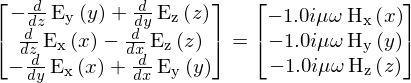

In [42]:
FaridayAntz=Fariday(Eantz, Hantz); FaridayAntz

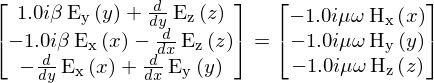

In [43]:
FaridayAntz=FaridayAntz.subs({Derivative(Ex, z): -1j*propConst*Ex, Derivative(Ey, z): -1j*propConst*Ey})
FaridayAntz

Define the Ampere-Maxwell equation in the frequency domain and apply the ansatz

In [44]:
Maxwell=lambda H, E: Eq(Curl(list(H.args)), 1j*radFreq*dielect*Matrix([E.args]).T)

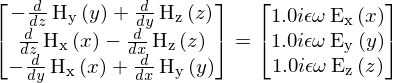

In [45]:
MaxwellAntz=Maxwell(Hantz, Eantz); MaxwellAntz

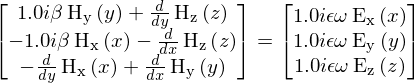

In [46]:
MaxwellAntz=MaxwellAntz.subs({Derivative(Hy, z): -1j*propConst*Hy, Derivative(Hx, z): -1j*propConst*Hx})
MaxwellAntz

Next using the set of Six equations with three unknowns and by specifying that we want to know the dependence of the transversal fields ($x,y$) based on the longitudinal field $z$. 


If deriving these is trivial for you then encode the steps using sympy else I am coping these from the book

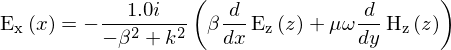

In [47]:
ExEq=Eq(Ex, (-1j/(k**2-propConst**2))*(propConst*Derivative(Ez, x)+radFreq*permConst*Derivative(Hz, y)))
ExEq

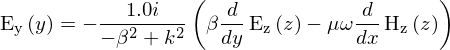

In [48]:
EyEq=Eq(Ey, (-1j/(k**2-propConst**2))*(propConst*Derivative(Ez, y)-radFreq*permConst*Derivative(Hz, x)))
EyEq

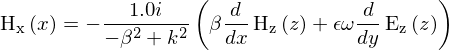

In [49]:
HxEq=Eq(Hx, (-1j/(k**2-propConst**2))*(propConst*Derivative(Hz, x)+radFreq*dielect*Derivative(Ez, y)))
HxEq

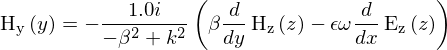

In [50]:
HyEq=Eq(Hy, (-1j/(k**2-propConst**2))*(propConst*Derivative(Hz, y)-radFreq*dielect*Derivative(Ez, x)))
HyEq

# TM 
Here the simplest of the two longitudinal carries is analyzed; that of the Transverse magnetic field case which is the case when there is no magnetic field in the direction of propagation; 
$$H_z=e^{-j\beta z}=0$$

Therefore out ansatz becomes

In [51]:
EzAntz=exp(-1j*z*propConst); EzAntz

In [52]:
Eantz=Eantz.subs(Ez, EzAntz); Eantz

In [53]:
XSol, YSol

In [54]:
ExSol=XSol.subs(X, Ex); ExSol
EySol=YSol.subs(Y, Ey); EySol
ExSol, EySol

## Solution via boundary conditions
Where recalling the setup of the coordinate system and that we are using perfect conductors then the electric field must be a node at the walls of the waveguides conductor since the transverse Electric field condition of the interface with no charge is 
$$n_t \times (E_2-E_2)=0$$
and the constrained solution follows

In [55]:
BoundSol={}

Find the trivial boundary conditions solution that of zero fields at the $x, y$ origin respectively

In [56]:
BoundSol[ExSol.subs(x, 0).rhs]=0
BoundSol

In [57]:
BoundSol[EySol.subs(y, 0).rhs]=0
BoundSol

Define mode (nth radial) numbers for the $x$ and $y$ respectively and solve for both the modes and the remaining integration constants 

In [58]:
m, n =symbols('m, n', real=True)

In [59]:
kSols={}

In [60]:
kxSol=Eq(ExSol.subs(x, m*a).subs(BoundSol).rhs, 0); kxSol

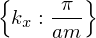

In [61]:
kSols[kx]=solve(kxSol, kx)[1]; kSols

In [62]:
kySol=Eq(EySol.subs(y, n*b).subs(BoundSol).rhs, 0); kySol
EySol.subs(y, n*b)

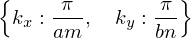

In [63]:
kSols[ky]=solve(kySol, ky)[1]; kSols

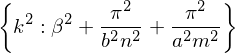

In [64]:
k2Sols={k**2: (propConst**2+kx**2+ky**2).subs(kSols)}
k2Sols

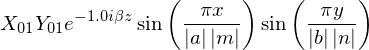

In [65]:
EzSol=Eantz.subs({ExSol.lhs: ExSol.rhs, EySol.lhs: EySol.rhs}).subs({**BoundSol, **kSols})
EzSol

And after finding all integration constants via the boundary conditions are the solution for the electric field in the propagation direction $E_Z$ as via collecting the remaining integration factors as the initial value the $E_z$ field

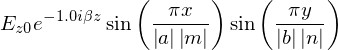

In [66]:
Ez0=symbols('E_z0', real=True)
EzSol=EzSol.subs(X01*Y01, Ez0); EzSol

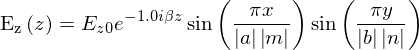

In [67]:
EzEqSol=Eq(Ez, EzSol); EzEqSol

Now using our results from Maxwell's equations that relates the longitudinal fields to the transversal fields, the transversal fields are found to be 

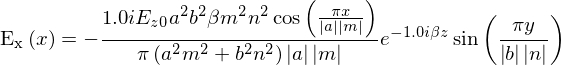

In [68]:
ExTMEq=simplify(ExEq.subs(Ez, EzSol).doit().subs(k2Sols)); ExTMEq

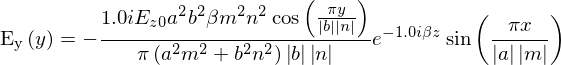

In [69]:
EyTMEq=simplify(EyEq.subs(Ez, EzSol).doit().subs(k2Sols)); EyTMEq

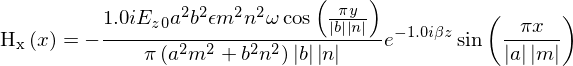

In [70]:
HxTMEq=simplify(HxEq.subs(Ez, EzSol).doit().subs(k2Sols)); HxTMEq

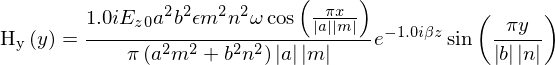

In [71]:
HyTMEq=simplify(HyEq.subs(Ez, EzSol).doit().subs(k2Sols)); HyTMEq

# Cut off frequency
To start off with Cutoff frequency is a common term in waveguides it denotes the lowest frequency for  the waveguide's dimension for a given mode($m, n$) that propagation (group ) term $\beta=0$ in $e^{-j\beta z}$ 
which means that for a given mode there is a lower frequency that will propagate along the longitudinal direction of the waveguide without any loss if the waveguide is perfect. While the cutoff condition gives the lowest continual frequency that propagates without decay. The truth is that any frequency below the cutoff condition may exist for a given length of the waveguide so long as it is influential. In fact by manipulating the geometry of the waveguide and or coupling it to other sections the fields in the waveguide can be filtered as needed. 

In [72]:
k2Eq=Eq(k**2,propConst**2+kx**2+ky**2); k2Eq

the propagation const $\beta$ which is related to the group wavelength and is better called the decay constant since it is similar to the decay constant in voltage decay in RC circuits. If we want an Electric field to transverse a perfect waveguide section without any losses we must have the $\beta =0$ whereby applying this relation to the separation constant equation that was found from the separated Helmholtz equation thusly

In [73]:
k2Eq

to than find not only the supported modes but also the supported radfreq from $k=\omega/c$

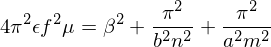

In [74]:
kEq=k2Eq.subs({**kSols, kWaveDef.lhs:kWaveDef.rhs}); kEq

### Side Note:
The terms $k_x=\dfrac{\pi}{am}$ are the spatial frequencies. In other words they give the allowed frequency for a given size $a$ and mode $m$ via 
$$f=c\dfrac{k}{2\pi}=\dfrac{c}{2ma}$$
if you go one to study fourier optics one will find that the angular spatial frequency is 
$$f=\sin(\theta)\dfrac{c}{2ma}\approx \dfrac{x}{z}\dfrac{c}{2ma}$$
which is the frequency of light to pass through an aperture $a$ projected to the optical axis ($z$) of the lens from the back focal plane at hight $x$ in the small angle approximation (See [Coherent Optics 2nd Ed.Sec 9.3.2](http://www.springer.com/gp/book/9783540439332)) by Lauterborn & Kurz))



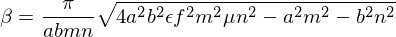

In [75]:
propConstTM=Eq(propConst, simplify(solve(kEq, propConst)[1]))
propConstTM

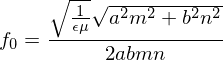

In [76]:
freqC=symbols('f_0', real=True)
freqCTM=Eq(freqC, simplify(solve(propConstTM.rhs, freq)[1])); freqCTM

In [77]:
freqCTMN=lambdify((m, n, a, b, dielect, permConst), freqCTM.rhs, dummify=False)
freqCTMN(1,1,1,1, epsilon_0, mu_0)

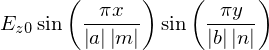

In [78]:
EzSol.subs(propConst,0)

The following substitutes all the auxiliary expressions into the expression for the transverse fields such that the field can be found from 
$$x, y, z, a, b, m, n, E_{z_0}, f, \epsilon, \mu$$ and then uses the sympy [`lambdify`](https://ocefpaf.github.io/python4oceanographers/blog/2014/01/27/batman/) to translate the symbolic exsperions to a numpy based `lambda` function to then genrate numerical results 

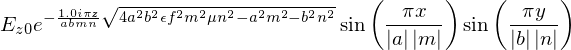

In [79]:
EzSol_RHS=EzSol.subs(propConstTM.lhs,propConstTM.rhs); EzSol_RHS

In [80]:
EzSolN=lambdify((x, y, z, m, n, a, b, Ez0, freq, dielect, permConst),EzSol_RHS, dummify=False)
EzSolN(0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 100e9, epsilon_0, mu_0)

(0.1976954745554553+0.9802634846510877j)

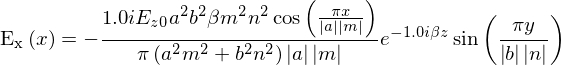

In [81]:
ExTMEq_RHS=simplify(ExTMEq.subs(propConstTM.lhs,propConstTM.rhs).rhs)
ExTMEq

In [82]:
ExTMEqN=lambdify((x, y, z, m, n, a, b, Ez0, freq, dielect, permConst), 
                 ExTMEq_RHS, dummify=False)
ExTMEqN(0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 100e9, epsilon_0, mu_0)

(2.0021748536777554e-14-4.0379032172325645e-15j)

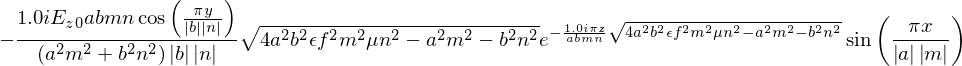

In [83]:
EyTMEq_RHS=simplify(EyTMEq.subs(propConstTM.lhs,propConstTM.rhs).rhs)
EyTMEq_RHS

In [84]:
EyTMEqN=lambdify((x, y, z, m, n, a, b, Ez0, freq, dielect, permConst), 
                 EyTMEq_RHS, dummify=False)
EyTMEqN(0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 100e9, epsilon_0, mu_0)

(2.0021748536777554e-14-4.0379032172325645e-15j)

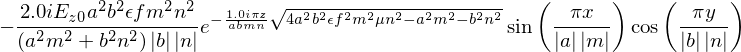

In [85]:
HxTMEq_RHS=simplify(HxTMEq.subs({propConstTM.lhs:propConstTM.rhs, radFreq:2*pi*freq}).rhs)
HxTMEq_RHS

In [86]:
HxTMEqN=lambdify((x, y, z, m, n, a, b, Ez0, freq, dielect, permConst), 
                HxTMEq_RHS , dummify=False)
HxTMEqN(0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 100e9, epsilon_0, mu_0)

(5.3146223725865325e-17-1.0718310010348996e-17j)

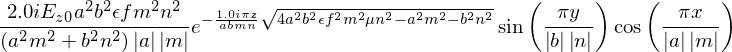

In [87]:
HyTMEq_RHS=simplify(HyTMEq.subs({propConstTM.lhs:propConstTM.rhs, radFreq:2*pi*freq}).rhs)
HyTMEq_RHS

In [88]:
HyTMEqN=lambdify((x, y, z, m, n, a, b, Ez0, freq, dielect, permConst), 
                 HyTMEq_RHS, dummify=False)
HyTMEqN(0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 100e9, epsilon_0, mu_0)

(-5.3146223725865325e-17+1.0718310010348996e-17j)

# Poynting Vector

The Poynting Vector is given by 
$$\hat S=\hat E \times\hat B$$ which is the power flux in the waveguide  and is related to the Irradiance in OPtics via the absolute value of the Poynting Vector 
$$I=<|\hat S|>=\left<\dfrac{E\cdot E^*}{Z}\right>=\left< n\dfrac{E\cdot E^*}{Z_0}\right>$$
where $Z_0$ is the free space impedance of $\approx 376.7 \Omega$ and $n$ is the index of refraction where for free space is taken as $1$
. Further the irradiance and phase within the geometrical optics approximation are related via 
$$\nabla \cdot \left(I(r) \dfrac{\nabla \Phi(r)}{n} \right)=0$$ as shown by [Campos-Garc´ıa & D´ıaz-Uribe](http://www.scielo.org.mx/pdf/rmf/v52n6/v52n6a9.pdf).
Where  $\Phi$ is the Phase of plane wave that is propagating down the waveguide such that even in this complicated equation we can see how the temporary average power and phase are related such that power can only flow in one direction in the waveguide




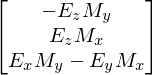

In [89]:
Ex, Ey, Ez, Mx, My, S=symbols('E_x, E_y, E_z, M_x, M_y, S')
PythongTMEq=Cross(Matrix([Ex, Ey, Ez]), Matrix([Mx, My, 0]))
PythongTMEq

In [90]:
PythongTMXEqN=lambdify((Ez, My), PythongTMEq[0], dummify=False)
PythongTMYEqN=lambdify((Ez, Mx), PythongTMEq[1], dummify=False)
PythongTMZEqN=lambdify((Ex, Ey, My, Mx), PythongTMEq[2], dummify=False)

# Visualization

https://www.everythingrf.com/tech-resources/waveguides-sizes

Here we use a standard commercial waveguide size from the above source to then visualize the lowest order fields of the $\text{TM}_{11}$ mode in the waveguide 

In [91]:
StaticValues={'m':1, 'n':1, 'a':584.2e-3, 'b':292.1e-3, 
              'epsilon':epsilon_0, 'mu':mu_0}
StaticValues

{'a': 0.5842,
 'b': 0.2921,
 'epsilon': 8.854187817620389e-12,
 'm': 1,
 'mu': 1.2566370614359173e-06,
 'n': 1}

Find the $\text{TM}_{11} $ mode cutoff frequency 

In [92]:
fN=freqCTMN(**StaticValues); fN

In [93]:
StaticValues['f']=2*fN; StaticValues['E_z0']=1
StaticValues

{'E_z0': 1,
 'a': 0.5842,
 'b': 0.2921,
 'epsilon': 8.854187817620389e-12,
 'f': 1147477431.0677006,
 'm': 1,
 'mu': 1.2566370614359173e-06,
 'n': 1}

## Generate and Store the Numerical Data  in Xarray Dataset

Here **Xarray** is used to store the fields and the coordinates such that each item in the Xarray Dataset has physical labeled coordinates relative to our physical simulation domain and the fields for each direction are then stored in a Dataarray. The analogy is that the Dataset acts like a hybrid dictionary, Meshgrid, and Pandas Dataframe with the index being 3 dimensional. All in all **Xarray** is a superb data storage structure for non 2D data leveraging the best of Numpy Arrays and the SQL Table (Dictionary) nature of Pandas for superior physical computational information storage

In [94]:
import xarray as xr
import itertools as Iter

Define the physical space

In [95]:
x_coord = np.linspace(0, StaticValues['a'], 20)
y_coord = np.linspace(0, StaticValues['b'], 20)
z_coord = np.linspace(0, 1, 20)

In [96]:
CoorEnterFunc = lambda x, y, z: 1+0*x+0*y+0*z

dx=xr.DataArray(x_coord, dims='x')
dy=xr.DataArray(y_coord, dims='y')
dz=xr.DataArray(z_coord, dims='z')

Use a hybridization of of Xarray and np.meshgrid to compute the `x, y, z` parameters fields and store in the xarray and repeat and add to the the DataArray for all the fields

In [97]:
SimDataSet = xr.Dataset({'Ez':(['x', 'y', 'z'], 
            EzSolN(*np.meshgrid(x_coord, y_coord, z_coord), **StaticValues))},
                  coords={'x':x_coord, 'y':y_coord, 'z':z_coord})
SimDataSet.attrs['units']={'Ey':'V/m'}
SimDataSet

<xarray.Dataset>
Dimensions:  (x: 20, y: 20, z: 20)
Coordinates:
  * x        (x) float64 0.0 0.03075 0.06149 0.09224 0.123 0.1537 0.1845 ...
  * y        (y) float64 0.0 0.01537 0.03075 0.04612 0.06149 0.07687 0.09224 ...
  * z        (z) float64 0.0 0.05263 0.1053 0.1579 0.2105 0.2632 0.3158 ...
Data variables:
    Ez       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
Attributes:
    units:    {'Ey': 'V/m'}

In [98]:
SimDataSet['Ex']=(['x', 'y', 'z',],
                       ExTMEqN(*np.meshgrid(x_coord, y_coord, z_coord), **StaticValues))
SimDataSet.attrs['units']['Ex']='V/m'
SimDataSet

<xarray.Dataset>
Dimensions:  (x: 20, y: 20, z: 20)
Coordinates:
  * x        (x) float64 0.0 0.03075 0.06149 0.09224 0.123 0.1537 0.1845 ...
  * y        (y) float64 0.0 0.01537 0.03075 0.04612 0.06149 0.07687 0.09224 ...
  * z        (z) float64 0.0 0.05263 0.1053 0.1579 0.2105 0.2632 0.3158 ...
Data variables:
    Ez       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
    Ex       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
Attributes:
    units:    {'Ey': 'V/m', 'Ex': 'V/m'}

In [99]:
SimDataSet['Ey']=(['x', 'y', 'z',],
                       EyTMEqN(*np.meshgrid(x_coord, y_coord, z_coord), **StaticValues))
SimDataSet.attrs['units']['Ey']='V/m'
SimDataSet

<xarray.Dataset>
Dimensions:  (x: 20, y: 20, z: 20)
Coordinates:
  * x        (x) float64 0.0 0.03075 0.06149 0.09224 0.123 0.1537 0.1845 ...
  * y        (y) float64 0.0 0.01537 0.03075 0.04612 0.06149 0.07687 0.09224 ...
  * z        (z) float64 0.0 0.05263 0.1053 0.1579 0.2105 0.2632 0.3158 ...
Data variables:
    Ez       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
    Ex       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Ey       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
Attributes:
    units:    {'Ey': 'V/m', 'Ex': 'V/m'}

In [100]:
SimDataSet['Mx']=(['x', 'y', 'z',],
                       HxTMEqN(*np.meshgrid(x_coord, y_coord, z_coord), **StaticValues))
SimDataSet.attrs['units']['Mx']='T/m'
SimDataSet

<xarray.Dataset>
Dimensions:  (x: 20, y: 20, z: 20)
Coordinates:
  * x        (x) float64 0.0 0.03075 0.06149 0.09224 0.123 0.1537 0.1845 ...
  * y        (y) float64 0.0 0.01537 0.03075 0.04612 0.06149 0.07687 0.09224 ...
  * z        (z) float64 0.0 0.05263 0.1053 0.1579 0.2105 0.2632 0.3158 ...
Data variables:
    Ez       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
    Ex       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Ey       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Mx       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
Attributes:
    units:    {'Ey': 'V/m', 'Ex': 'V/m', 'Mx': 'T/m'}

In [101]:
SimDataSet['My']=(['x', 'y', 'z',],
                       HyTMEqN(*np.meshgrid(x_coord, y_coord, z_coord), **StaticValues))
SimDataSet.attrs['units']['My']='T/m'
SimDataSet

<xarray.Dataset>
Dimensions:  (x: 20, y: 20, z: 20)
Coordinates:
  * x        (x) float64 0.0 0.03075 0.06149 0.09224 0.123 0.1537 0.1845 ...
  * y        (y) float64 0.0 0.01537 0.03075 0.04612 0.06149 0.07687 0.09224 ...
  * z        (z) float64 0.0 0.05263 0.1053 0.1579 0.2105 0.2632 0.3158 ...
Data variables:
    Ez       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
    Ex       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Ey       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Mx       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    My       (x, y, z) complex128 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j -0j 0j 0j ...
Attributes:
    units:    {'Ey': 'V/m', 'Ex': 'V/m', 'Mx': 'T/m', 'My': 'T/m'}

In [102]:
SimDataSet['Sx']=(['x', 'y', 'z',],
                       PythongTMXEqN(SimDataSet['Ez'], SimDataSet['My']))
SimDataSet.attrs['units']['Sx']='W'

SimDataSet['Sy']=(['x', 'y', 'z',],
                       PythongTMYEqN(SimDataSet['Ez'], SimDataSet['Mx']))
SimDataSet.attrs['units']['Sy']='W'

SimDataSet['Sz']=(['x', 'y', 'z',],
                       PythongTMZEqN(SimDataSet['Ex'], SimDataSet['Ey'], SimDataSet['My'], SimDataSet['Mx']))
SimDataSet.attrs['units']['Sz']='W'
SimDataSet

<xarray.Dataset>
Dimensions:  (x: 20, y: 20, z: 20)
Coordinates:
  * x        (x) float64 0.0 0.03075 0.06149 0.09224 0.123 0.1537 0.1845 ...
  * y        (y) float64 0.0 0.01537 0.03075 0.04612 0.06149 0.07687 0.09224 ...
  * z        (z) float64 0.0 0.05263 0.1053 0.1579 0.2105 0.2632 0.3158 ...
Data variables:
    Ez       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
    Ex       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Ey       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    Mx       (x, y, z) complex128 0j -0j 0j 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j ...
    My       (x, y, z) complex128 0j 0j 0j -0j -0j 0j 0j 0j 0j -0j -0j 0j 0j ...
    Sx       (x, y, z) complex128 -0j -0j -0j -0j -0j -0j -0j -0j -0j -0j ...
    Sy       (x, y, z) complex128 0j 0j 0j (-0+0j) (-0+0j) 0j 0j 0j 0j ...
    Sz       (x, y, z) complex128 0j 0j 0j 0j 0j 0j 0j 0j 0j 0j 0j 0j 0j 0j ...
Attributes:
    units:    {'Ey': 'V/m', 'Ex': 'V/m', 

force the Complex fields to real (though it is interesting to plot these complex fields in yt, if you want to try just rerun this notebook after commenting out the following cell)

In [103]:
for i in SimDataSet.data_vars:
    SimDataSet[i]=np.abs(SimDataSet[i])

## Visualize the Field Magnitudes with YT

In [104]:
import yt
yt.toggle_interactivity()

import matplotlib.pyplot as plt
%matplotlib notebook

Using matplotlib backend: Qt5Agg


Establish the visual spatial domains in YT from the xarray Dataset coordinates max min

In [105]:
bbox=[]
for i in ['x', 'y', 'z']:
    bbox.append([float(SimDataSet.coords[i].min()), float(SimDataSet.coords[i].max())])
bbox=np.array(bbox)
bbox

array([[ 0.    ,  0.5842],
       [ 0.    ,  0.2921],
       [ 0.    ,  1.    ]])

move the Dataarray values from xarray to yt. Note at this point I have not gotten YT units to work well and am thus using dummy units till this is figured out 

In [106]:
YTDataObj={i:(np.array(SimDataSet[i]), 'g/m**3') for i in SimDataSet.data_vars}
#would not except unit in SimDataSet.attrs['units']['ChargeDen'] had to fake with
#'g/m**3'

In [107]:
YTDataObj = yt.load_uniform_grid(YTDataObj, tuple(dict(SimDataSet.dims).values()), length_unit="m", bbox=bbox, nprocs=64)

yt : [INFO     ] 2018-04-17 05:18:43,982 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-04-17 05:18:43,984 Parameters: domain_dimensions         = [20 20 20]
yt : [INFO     ] 2018-04-17 05:18:43,986 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-04-17 05:18:43,987 Parameters: domain_right_edge         = [ 0.5842  0.2921  1.    ]
yt : [INFO     ] 2018-04-17 05:18:43,989 Parameters: cosmological_simulation   = 0.0


### Visualizes the fields individually

yt : [INFO     ] 2018-04-17 05:18:50,078 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:18:50,080 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:18:50,197 Creating transfer function
yt : [INFO     ] 2018-04-17 05:18:50,199 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


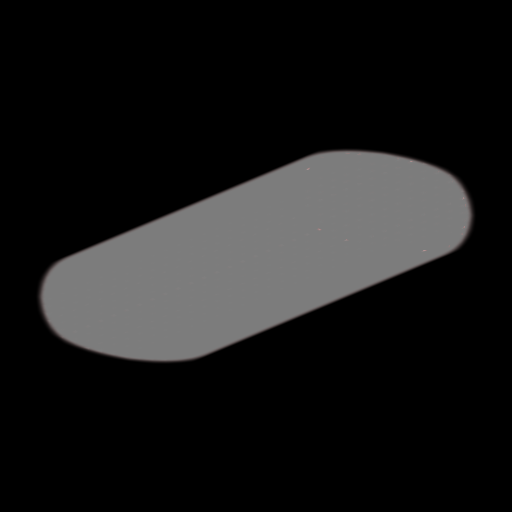

In [108]:
EzScene = yt.create_scene(YTDataObj, 'Ez')
source2 = EzScene[0]
EzScene.camera.set_width(EzScene.quan(1, 'm'))
EzScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:18:56,938 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:18:56,940 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:18:57,027 Creating transfer function
yt : [INFO     ] 2018-04-17 05:18:57,027 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


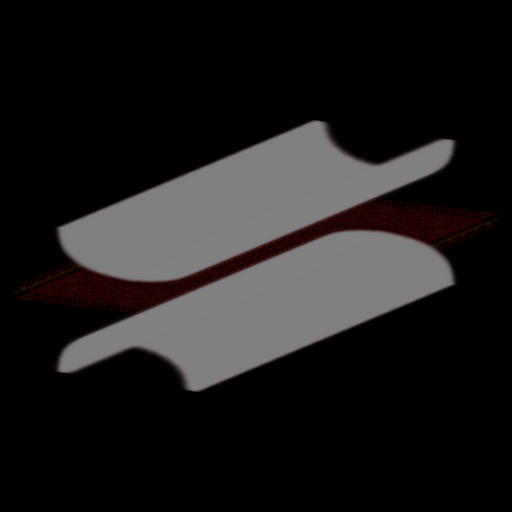

In [109]:
ExScene = yt.create_scene(YTDataObj, 'Ex')
source2 = ExScene[0]
ExScene.camera.set_width(ExScene.quan(1, 'm'))
ExScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:19:00,727 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:00,729 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:19:00,812 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:00,815 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


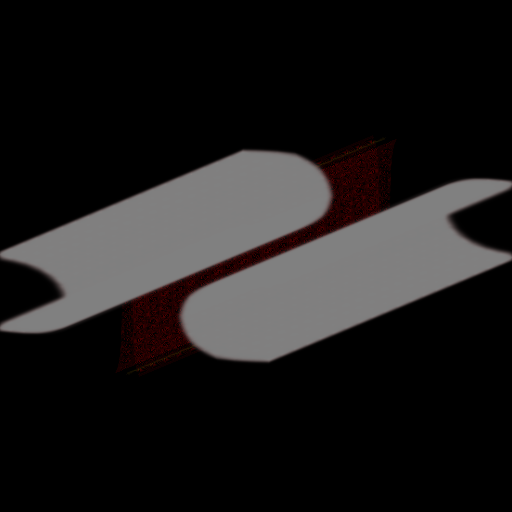

In [110]:
EyScene = yt.create_scene(YTDataObj, 'Ey')
source2 = EyScene[0]
EyScene.camera.set_width(EyScene.quan(1, 'm'))
EyScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:19:04,051 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:04,052 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:19:04,159 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:04,160 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


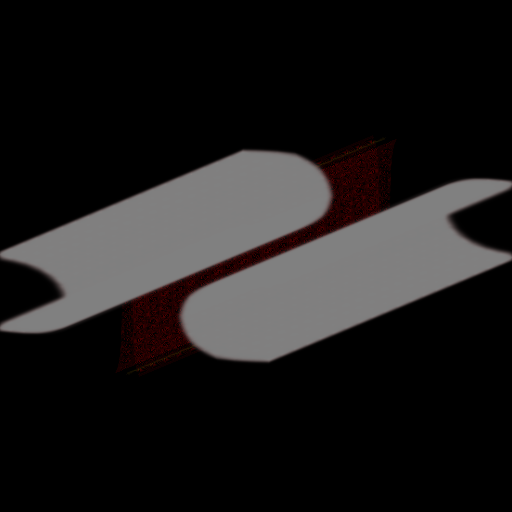

In [111]:
MxScene = yt.create_scene(YTDataObj, 'Mx')
source2 = MxScene[0]
MxScene.camera.set_width(MxScene.quan(1, 'm'))
MxScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:19:07,403 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:07,405 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:19:07,511 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:07,512 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


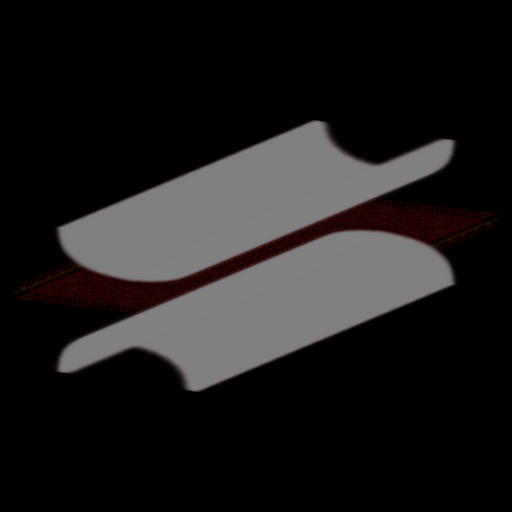

In [112]:
MyScene = yt.create_scene(YTDataObj, 'My')
source2 = MyScene[0]
MyScene.camera.set_width(MyScene.quan(1, 'm'))
MyScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:19:10,646 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:10,647 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:19:10,751 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:10,752 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


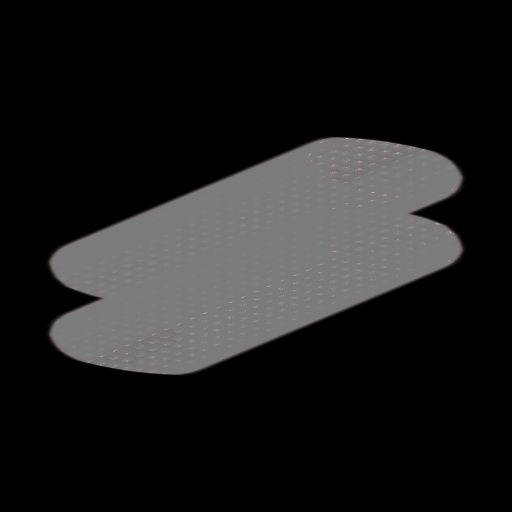

In [113]:
SxScene = yt.create_scene(YTDataObj, 'Sx')
source2 = SxScene[0]
SxScene.camera.set_width(MyScene.quan(1, 'm'))
SxScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:19:16,207 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:16,208 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:19:16,296 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:16,297 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


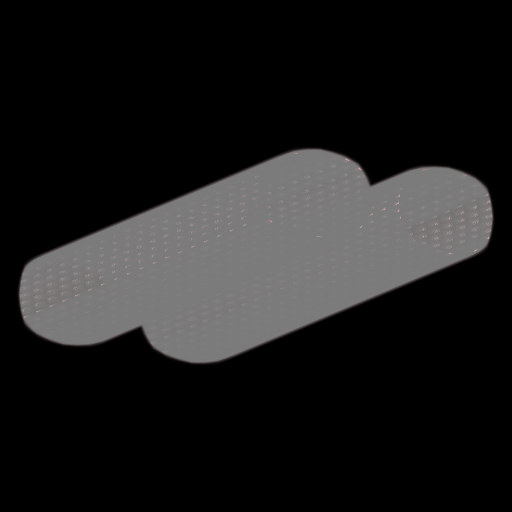

In [114]:
SyScene = yt.create_scene(YTDataObj, 'Sy')
source2 = SyScene[0]
SyScene.camera.set_width(MyScene.quan(1, 'm'))
SyScene.show(sigma_clip=3)

yt : [INFO     ] 2018-04-17 05:19:19,581 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:19,583 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-04-17 05:19:19,676 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:19,678 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


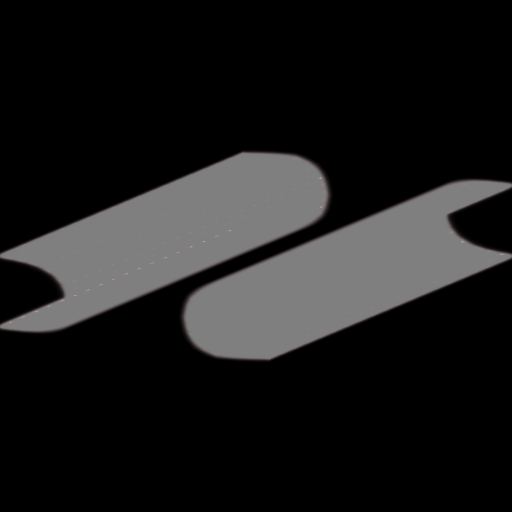

In [115]:
SzScene = yt.create_scene(YTDataObj, 'Sz')
source2 = SzScene[0]
SzScene.camera.set_width(MyScene.quan(1, 'm'))
SzScene.show(sigma_clip=3)

### Visualize the fields grouping field types

In [116]:
from yt.visualization.volume_rendering.api import Scene, VolumeSource

In [117]:
sc = Scene()
cam = sc.add_camera(YTDataObj, lens_type='perspective')
cam.resolution = [400, 400]
cam.position = YTDataObj.arr([1, 1, 1], 'm')
cam.switch_orientation()

yt : [INFO     ] 2018-04-17 05:19:32,024 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:32,025 Creating volume
yt : [INFO     ] 2018-04-17 05:19:32,843 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:32,844 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2018-04-17 05:19:34,496 Creating volume
yt : [INFO     ] 2018-04-17 05:19:35,243 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:35,244 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2018-04-17 05:19:36,975 Creating volume
yt : [INFO     ] 2018-04-17 05:19:37,653 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:37,654 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


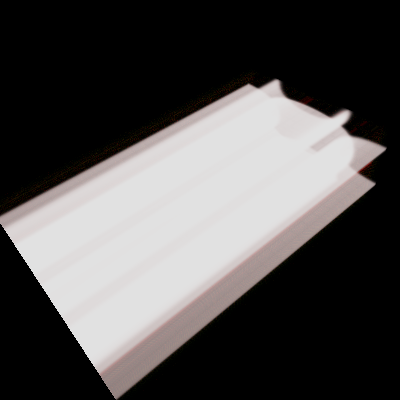

In [118]:
Ezz = VolumeSource(YTDataObj, field='Ez')
Ezz.use_ghost_zones = True
sc.add_source(Ezz)

Exx = VolumeSource(YTDataObj, field='Ex')
Exx.use_ghost_zones = True
sc.add_source(Exx)

Eyy = VolumeSource(YTDataObj, field='Ey')
Eyy.use_ghost_zones = True
sc.add_source(Eyy)
sc.show( sigma_clip=1)

In [119]:
sc = Scene()
cam = sc.add_camera(YTDataObj, lens_type='perspective')
cam.resolution = [400, 400]
cam.position = YTDataObj.arr([1, 1, 1], 'm')
cam.switch_orientation()

yt : [INFO     ] 2018-04-17 05:19:52,193 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:19:52,195 Creating volume
yt : [INFO     ] 2018-04-17 05:19:52,910 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:52,911 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2018-04-17 05:19:54,002 Creating volume
yt : [INFO     ] 2018-04-17 05:19:54,653 Creating transfer function
yt : [INFO     ] 2018-04-17 05:19:54,654 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


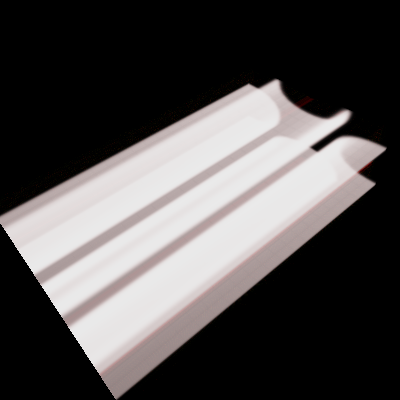

In [120]:
Mxx = VolumeSource(YTDataObj, field='Mx')
Mxx.use_ghost_zones = True
sc.add_source(Mxx)

Myy = VolumeSource(YTDataObj, field='My')
Myy.use_ghost_zones = True
sc.add_source(Myy)
sc.show( sigma_clip=1)

In [121]:
sc = Scene()
cam = sc.add_camera(YTDataObj, lens_type='perspective')
cam.resolution = [400, 400]
cam.position = YTDataObj.arr([1, 1, 1], 'm')
cam.switch_orientation()

yt : [INFO     ] 2018-04-17 05:20:01,142 Rendering scene (Can take a while).
yt : [INFO     ] 2018-04-17 05:20:01,144 Creating volume
yt : [INFO     ] 2018-04-17 05:20:01,833 Creating transfer function
yt : [INFO     ] 2018-04-17 05:20:01,834 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2018-04-17 05:20:02,934 Creating volume
yt : [INFO     ] 2018-04-17 05:20:03,664 Creating transfer function
yt : [INFO     ] 2018-04-17 05:20:03,665 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2018-04-17 05:20:04,749 Creating volume
yt : [INFO     ] 2018-04-17 05:20:05,447 Creating transfer function
yt : [INFO     ] 2018-04-17 05:20:05,448 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


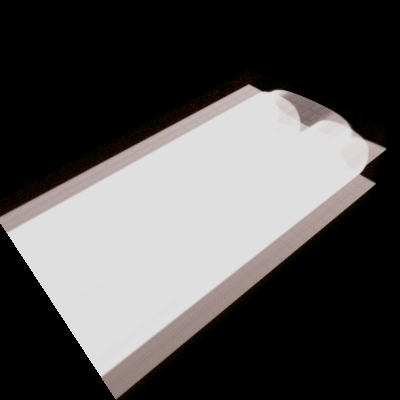

In [122]:
Sxx = VolumeSource(YTDataObj, field='Sx')
Sxx.use_ghost_zones = True
sc.add_source(Sxx)

Syy = VolumeSource(YTDataObj, field='Sy')
Syy.use_ghost_zones = True
sc.add_source(Syy)

Szz = VolumeSource(YTDataObj, field='Sz')
Szz.use_ghost_zones = True
sc.add_source(Szz)

sc.show( sigma_clip=1)

# Conclusion and Todo

The above shows that by leveraging above tools from **NumFocus** even complex electric field calculations and demenstarable visualizations can be accomplished in a $100\%$ Open Source maner with striking results and great pertinis to teaching and understanding that for visualizing the fields in waveguides we were previously restricted to diagrams such as


<img src="https://www.researchgate.net/profile/Suhas_Dinesh/post/How_to_figure_out_number_of_modes_in_HFSS/attachment/59d646ba79197b80779a1b23/AS%3A459446200606724%401486551918898/download/modes+RW.jpg", width=200, height=200>

But with the stack of **Sympy**, **Xarray**, & **yt** Scientific Python becomes distributed learning platform. And with the inclusion of jupyter notebook widgets a nonstatic learning and the collective editing and distribution of Github the Python NumFocus stack is a resource that has only just started to become the teaching resource for the 21st century. Though this will only come about by more integration between the various libraries, and continued support to foundations such as **NumFocus** and **Python Software Foundation** 

## Todo:
\begin{itemize}
\item Extend to the TE waveguide setup
\item Get yt units working with the correct units for the respective fields 
\item Get yt transfer function working with this example
\item yt add low alpha boundary box for the waveguide 
\item clean up the theory of this
\item Get sympy to put equations in standard formate
\item add Jupyter Notebook Widgets to make interactive
\item ToDo after yt Transfer function is dealt with: Add autocalate for other lower term modes and supperpose them 
\end{itemize}



